<a href="https://colab.research.google.com/github/PietroDF/Sequence_to_Sequence/blob/master/Neural_machine_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural machine translation

Inspiring tutorial @ https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

Inspiring tutorial 2 @ https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/


Models properties @ https://spacy.io/models

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Drive mount

In [0]:
# from google.colab import drive
# drive.mount('/gdrive')

## Dataset download

In [0]:
!mkdir '/content/dataset_directory'

In [0]:
!wget --no-check-certificate \
    http://www.manythings.org/anki/ita-eng.zip \
    -O /content/dataset_directory/parallel_corpora.zip

--2020-04-19 07:43:18--  http://www.manythings.org/anki/ita-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.109.196, 104.24.108.196, 2606:4700:3037::6818:6cc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.109.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7345811 (7.0M) [application/zip]
Saving to: ‘/content/dataset_directory/parallel_corpora.zip’

/content/dataset_di 100%[===================>]   7.00M  5.83MB/s    in 1.2s    

2020-04-19 07:43:20 (5.83 MB/s) - ‘/content/dataset_directory/parallel_corpora.zip’ saved [7345811/7345811]



In [0]:
!unzip /content/dataset_directory/parallel_corpora.zip -d /content/dataset_directory

Archive:  /content/dataset_directory/parallel_corpora.zip
  inflating: /content/dataset_directory/ita.txt  
  inflating: /content/dataset_directory/_about.txt  


In [0]:
!rm /content/dataset_directory/parallel_corpora.zip

## Lettura del dataset

In [0]:
parallel_corpora = []
with open('/content/dataset_directory/ita.txt') as f:
    
    for line in f:

        inner_list = [elt.strip(".").replace("è","")
                                    .replace("é","")
                                    .lower()
                                    .replace('?','')
                                    .replace("'",'')
                                    .replace('!','')
                                    .replace("  "," ") for elt in line.split('\t')]
        parallel_corpora.append(inner_list[:2])

In [0]:
parallel_corpora[300001]

['i dont know how to solve this problem',
 'io non so come risolvere questo problema']

# inizio

In [0]:
np.shape(parallel_corpora)

(336614, 2)

In [0]:
ita_txt = ["prendi quel pallone", "prendi il libro", "dammi quel libro", "dammi il gelato"]
eng_txt = ["take that ball", "take the book", "give me that book", "give me the icecream"]

In [0]:
ita_txt = []
eng_txt = []

sentence_min_lenght = 5
sentence_max_lenght = 8

reduce_factor = 0.015

for sentence in parallel_corpora:

  if len(sentence[0].split(' '))>=sentence_min_lenght and len(sentence[0].split(' '))<=sentence_max_lenght :

    if np.random.rand()<reduce_factor:
      eng_txt.append(sentence[0])
      ita_txt.append(sentence[1])

In [0]:
len(ita_txt)

3106

In [0]:
def find_distinct_words(sentence_list):

  distinct_words_bla = []

  distinct_words_bla.append([x.split(' ') for x in sentence_list])

  distinct_words =[]

  for words in distinct_words_bla[0]:
    for j in words:
      distinct_words.append(j)

  distinct_words = np.asarray(distinct_words)

  #distinct_words = np.reshape(distinct_words, distinct_words.shape[0]*distinct_words.shape[1]*distinct_words.shape[2])

  distinct_words = np.unique(distinct_words)

  #distinct_words = list(distinct_words)

  return np.array(distinct_words)

In [0]:
# distinct_words = find_distinct_words(ita_txt)
# distinct_words

In [0]:
def crea_dizionario(list_distinct_words):

  encoded = to_categorical(np.arange(len(list_distinct_words)))

  my_dict = {}
  
  for word,enc in zip(list_distinct_words,encoded):

    my_dict[word] = enc

  return my_dict

# Skip gram model

In [0]:
def crea_accoppiamenti(sentence_list, neighbour=1):

  word_couples = []

  for sentence in sentence_list:
    separated_sentence = sentence.split(' ')

    for idx,word in enumerate(separated_sentence):

      for delta in range(neighbour):
        word_couples.append([word,separated_sentence[idx-delta-1]])
        
        try:
          word_couples.append([word,separated_sentence[idx+delta+1]])
        except:
          pass;

  return word_couples

In [0]:
#crea_accoppiamenti(ita_txt)

In [0]:
def encode_accoppiamenti(accoppiamenti, diz_encoding):

  x_input = []
  x_outpt = []

  for coppia in accoppiamenti:
    x_input.append(diz_encoding[coppia[0]])
    x_outpt.append(diz_encoding[coppia[1]])

  return np.array(x_input), np.array(x_outpt)

In [0]:
def prepara_accoppiamenti(txt):
  distinct_words = find_distinct_words(txt)
  diz_encoding =  crea_dizionario(distinct_words)
  accoppiamenti = crea_accoppiamenti(txt, neighbour=1)

  return distinct_words, accoppiamenti, diz_encoding 

In [0]:
#ita_distinct_words = find_distinct_words(ita_txt)
#ita_diz_encoding =  crea_dizionario(ita_distinct_words)
#ita_accoppiamenti = crea_accoppiamenti(ita_txt)

In [0]:
ita_distinct_words, ita_accoppiamenti, ita_diz_encoding = prepara_accoppiamenti(ita_txt)
eng_distinct_words, eng_accoppiamenti, eng_diz_encoding = prepara_accoppiamenti(eng_txt)

In [0]:
ita_enc_input, ita_enc_outpt = encode_accoppiamenti(ita_accoppiamenti, ita_diz_encoding)
eng_enc_input, eng_enc_outpt = encode_accoppiamenti(eng_accoppiamenti, eng_diz_encoding)

In [0]:
eng_enc_input[0],ita_enc_outpt[0]

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [0]:
ita_enc_input.shape, eng_enc_input.shape

((32456, 3314), (34748, 2324))

### Model skipgram

In [0]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization

model made with functional-api

In [0]:
def create_model(enc_input, hidden_representation_dimension, enc_outpt):

  # This returns a tensor
  net_inputs = Input(shape=(enc_input.shape[1],))

  # a layer instance is callable on a tensor, and returns a tensor
  net_encode_layer = Dense(hidden_representation_dimension, activation='relu')(net_inputs)
  net_encode_layer = BatchNormalization()(net_encode_layer)

  net_decode_layer = Dense(enc_outpt.shape[1], activation='softmax')(net_encode_layer)

  net_skipgram = Model(inputs=net_inputs, outputs=net_decode_layer)

  # Create model
  net_encoder = Model(inputs=net_inputs, outputs=net_encode_layer)

  print('\n'*3+'net_skipgram\n')
  net_skipgram.summary()

  print('\n'*3+'net_encoder\n')
  net_encoder.summary()

  return net_encoder, net_skipgram

In [0]:
hidden_representation_dimension = 40

In [0]:
ita_encoder, ita_skipgram = create_model(ita_enc_input, hidden_representation_dimension, ita_enc_outpt)




net_skipgram

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3314)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                132600    
_________________________________________________________________
batch_normalization_17 (Batc (None, 40)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 3314)              135874    
Total params: 268,634
Trainable params: 268,554
Non-trainable params: 80
_________________________________________________________________



net_encoder

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3314)]            0         
__

In [0]:
eng_encoder, eng_skipgram = create_model(eng_enc_input, hidden_representation_dimension, eng_enc_outpt)




net_skipgram

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 2324)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                93000     
_________________________________________________________________
batch_normalization_18 (Batc (None, 40)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 2324)              95284     
Total params: 188,444
Trainable params: 188,364
Non-trainable params: 80
_________________________________________________________________



net_encoder

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 2324)]            0         
__

In [0]:
ita_skipgram.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [0]:
eng_skipgram.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [0]:
num_train_epoch = 20

In [0]:
ita_history = ita_skipgram.fit(ita_enc_input, ita_enc_outpt, epochs=num_train_epoch,verbose=1)

Epoch 1/20
1015/1015 [==============================] - 5s 5ms/step - loss: 6.8415 - accuracy: 0.0621
Epoch 2/20
1015/1015 [==============================] - 5s 5ms/step - loss: 6.0006 - accuracy: 0.0952
Epoch 3/20
1015/1015 [==============================] - 5s 5ms/step - loss: 5.5969 - accuracy: 0.1247
Epoch 4/20
1015/1015 [==============================] - 5s 5ms/step - loss: 5.2378 - accuracy: 0.1440
Epoch 5/20
1015/1015 [==============================] - 5s 5ms/step - loss: 4.9457 - accuracy: 0.1572
Epoch 6/20
1015/1015 [==============================] - 6s 6ms/step - loss: 4.7160 - accuracy: 0.1632
Epoch 7/20
1015/1015 [==============================] - 5s 5ms/step - loss: 4.5409 - accuracy: 0.1645
Epoch 8/20
1015/1015 [==============================] - 5s 5ms/step - loss: 4.4187 - accuracy: 0.1654
Epoch 9/20
1015/1015 [==============================] - 5s 5ms/step - loss: 4.3251 - accuracy: 0.1628
Epoch 10/20
1015/1015 [==============================] - 5s 5ms/step - loss: 4.252

In [0]:
eng_history = eng_skipgram.fit(eng_enc_input, eng_enc_outpt, epochs=num_train_epoch,verbose=1)

Epoch 1/20
1086/1086 [==============================] - 4s 4ms/step - loss: 6.1861 - accuracy: 0.0925
Epoch 2/20
1086/1086 [==============================] - 4s 4ms/step - loss: 5.3433 - accuracy: 0.1313
Epoch 3/20
1086/1086 [==============================] - 4s 4ms/step - loss: 5.0193 - accuracy: 0.1484
Epoch 4/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.7777 - accuracy: 0.1570
Epoch 5/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.5976 - accuracy: 0.1621
Epoch 6/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.4620 - accuracy: 0.1648
Epoch 7/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.3626 - accuracy: 0.1612
Epoch 8/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.2867 - accuracy: 0.1604
Epoch 9/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.2308 - accuracy: 0.1595
Epoch 10/20
1086/1086 [==============================] - 4s 4ms/step - loss: 4.190

### Plot loss

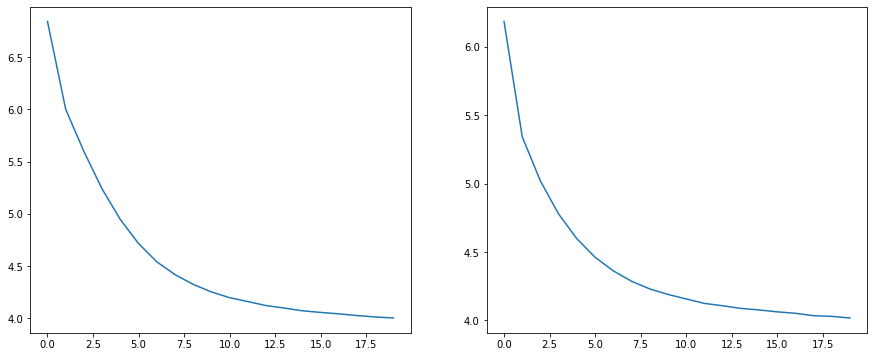

In [0]:
plt.figure(figsize=(15,6))

ita_loss = ita_history.history['loss']
plt.subplot(1,2,1)
plt.plot(ita_loss)

eng_loss = eng_history.history['loss']
plt.subplot(1,2,2)
plt.plot(eng_loss)

plt.show()

## Trasformo le parole in word2vec

In [0]:
def crea_diz_word2vec(encoder, distinct_words, diz_encoding):

  diz_word2vec = {}

  diz_word2vec['_'] = np.zeros(encoder.output.shape[1])

  for parola in distinct_words:
    diz_word2vec[parola] = encoder.predict(np.expand_dims(diz_encoding[parola], axis=0))[0]

  return diz_word2vec

In [0]:
ita_diz_word2vec = crea_diz_word2vec(ita_encoder, ita_distinct_words, ita_diz_encoding)
eng_diz_word2vec = crea_diz_word2vec(eng_encoder, eng_distinct_words, eng_diz_encoding)

## padding delle parole

In [0]:
def add_padding_to_seq(corpus, seq_max_len = 10):
  
  padded_corpus = []

  for testo in corpus:
    testo = testo.split(' ')

    if len(testo)>seq_max_len:
      testo = testo[-seq_max_len:]

    testo = testo+['_' for x in range(seq_max_len-len(testo))]

    padded_corpus.append(testo)

  return padded_corpus

In [0]:
def dense_encode_padded_sequence(padded_seq, diz_word2vec):

  pad_seq = []

  for testo in padded_seq:
    x = []
    for parola in testo:
      x.append(diz_word2vec[parola])
    
    pad_seq.append(x)
  
  return np.asarray(pad_seq)

In [0]:
def prepare_input(txt, diz_word2vec, seq_max_length=10):

  txt_padded = add_padding_to_seq(txt, seq_max_length)
  txt_padded = dense_encode_padded_sequence(txt_padded,diz_word2vec)
  
  return txt_padded

In [0]:
len(ita_diz_word2vec['sono'])

40

In [0]:
seq_max_length = 8

ita_txt_padded = prepare_input(ita_txt, ita_diz_word2vec, seq_max_length)
eng_txt_padded = prepare_input(eng_txt, eng_diz_word2vec, seq_max_length)

In [0]:
np.shape(eng_txt_padded), np.shape(eng_txt_padded)[-2:]

((3106, 8, 40), (8, 40))

## Translation model

In [0]:
# from keras.models import Model
# from keras.layers import Input, LSTM, Dense

# # Define an input sequence and process it.
# encoder_inputs = Input(shape=(None, num_encoder_tokens))
# encoder = LSTM(latent_dim, return_state=True)
# encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# # We discard `encoder_outputs` and only keep the states.
# encoder_states = [state_h, state_c]

# # Set up the decoder, using `encoder_states` as initial state.
# decoder_inputs = Input(shape=(None, num_decoder_tokens))

# # We set up our decoder to return full output sequences,
# # and to return internal states as well. We don't use the 
# # return states in the training model, but we will use them in inference.
# decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
#                                      initial_state=encoder_states)

# decoder_dense = Dense(num_decoder_tokens, activation='softmax')
# decoder_outputs = decoder_dense(decoder_outputs)

# # Define the model that will turn
# # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
# model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [0]:
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_split=0.2)

In [0]:
n_units_ = 200
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

In [0]:
trans_net = Sequential()

trans_net.add(Input(shape=(np.shape(ita_txt_padded)[-2:])))

trans_net.add(LSTM(n_units, return_sequences=True, activation='linear'))
trans_net.add(BatchNormalization())

trans_net.add(LSTM(n_units, return_sequences=True, activation='linear'))
trans_net.add(BatchNormalization())

trans_net.add(LSTM(np.shape(eng_txt_padded)[-1], return_sequences=True, activation='linear'))
trans_net.add(BatchNormalization())

trans_net.add(LSTM(np.shape(eng_txt_padded)[-1], return_sequences=True, activation='linear'))
#trans_net.add(BatchNormalization())

In [0]:
trans_net.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 8, 200)            192800    
_________________________________________________________________
batch_normalization_19 (Batc (None, 8, 200)            800       
_________________________________________________________________
lstm_18 (LSTM)               (None, 8, 200)            320800    
_________________________________________________________________
batch_normalization_20 (Batc (None, 8, 200)            800       
_________________________________________________________________
lstm_19 (LSTM)               (None, 8, 40)             38560     
_________________________________________________________________
batch_normalization_21 (Batc (None, 8, 40)             160       
_________________________________________________________________
lstm_20 (LSTM)               (None, 8, 40)            

In [0]:
from tensorflow.keras import callbacks

In [0]:
NoLearning = callbacks.EarlyStopping(monitor='loss',
                                     min_delta=0.003,
                                     patience=5,
                                     verbose=1,
                                     mode='auto',
                                     baseline=None,
                                     restore_best_weights=False)

In [0]:
trans_net.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

In [0]:
trans_net_epoch = 800

In [0]:
trans_net_hist = trans_net.fit(ita_txt_padded, eng_txt_padded, 
                               epochs=trans_net_epoch, 
                               verbose=1,
                               callbacks=[NoLearning])

Epoch 1/800
98/98 [==============================] - 4s 39ms/step - loss: 2.4025 - mse: 2.4038
Epoch 2/800
98/98 [==============================] - 4s 38ms/step - loss: 2.2651 - mse: 2.2618
Epoch 3/800
98/98 [==============================] - 4s 43ms/step - loss: 2.1874 - mse: 2.1845
Epoch 4/800
98/98 [==============================] - 5s 46ms/step - loss: 2.1327 - mse: 2.1282
Epoch 5/800
98/98 [==============================] - 4s 43ms/step - loss: 2.0784 - mse: 2.0770
Epoch 6/800
98/98 [==============================] - 4s 38ms/step - loss: 2.0252 - mse: 2.0274
Epoch 7/800
98/98 [==============================] - 4s 38ms/step - loss: 1.9697 - mse: 1.9714
Epoch 8/800
98/98 [==============================] - 4s 38ms/step - loss: 1.9235 - mse: 1.9240
Epoch 9/800
98/98 [==============================] - 4s 38ms/step - loss: 1.8697 - mse: 1.8635
Epoch 10/800
98/98 [==============================] - 4s 38ms/step - loss: 1.8166 - mse: 1.8122
Epoch 11/800
98/98 [=============================

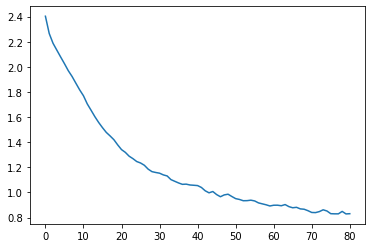

In [0]:
plt.plot(trans_net_hist.history['loss'])
plt.show()

## Try to predict new text

In [0]:
ita_distinct_words[::40]

array(['', 'abituata', 'agente', 'allinsegnante', 'andando', 'apertura',
       'ascoltavo', 'attenzione', 'avevi', 'bambino', 'bianco', 'buono.',
       'cantante', 'casa,', 'chiamata', 'cinema', 'cominciamo',
       'confrontò', 'convegno', 'crede', 'dal', 'decollato', 'dica',
       'dirlo', 'diversa', 'dormì', 'effettuerà', 'estraneo', 'farina',
       'fidarci', 'force', 'funziona', 'giardino', 'grammatica,',
       'hockey,', 'importi', 'inglese', 'interruppe', 'lana', 'lavoravo',
       'lidea', 'lunga', 'mangiò', 'mentito', 'minuti', 'museo', 'nera',
       'occhiali', 'oro', 'parlando', 'passi', 'pere', 'piaciuto', 'più',
       'posti', 'prendendo', 'previsti', 'pronto', 'puntualità', 'questa',
       'regali', 'ridere', 'ripetuto', 'riviste', 'sapeva', 'scese',
       'scuso', 'sensi', 'siamo', 'sole', 'specie', 'sprecato', 'sto',
       'sulla', 'tanto', 'test', 'tradirei', 'trovarvi', 'unauto',
       'valigia', 'vengo', 'viene,', 'volevi'], dtype='<U17')

In [0]:
num_sentence= 3013
ita_txt[num_sentence:num_sentence+2], eng_txt[num_sentence]

(['la povertà ancora la principale causa del crimine',
  'lo interruppe mentre stava parlando'],
 'poverty is still the major cause of crime')

In [0]:
len(ita_txt)

3106

In [0]:
rand_sent = np.random.randint(len(ita_txt), size=10)

In [0]:
traduzione = []

num_sentence = 100

ita_samples = ita_txt[30:300:10]
eng_samples = eng_txt[30:300:10]

frase_ita_padded = prepare_input(ita_samples, ita_diz_word2vec)
frase_ita_predicted = trans_net.predict(frase_ita_padded)

for frase_ita in frase_ita_predicted:

  x = []

  for parola in frase_ita:    

    parola_decodificata = []
    distanza = np.zeros(len(eng_diz_word2vec))

    for idx, parola_target in enumerate(eng_diz_word2vec):

      distanza[idx] = np.linalg.norm(parola - eng_diz_word2vec[parola_target])
      parola_decodificata.append(parola_target)
  
    x.append(parola_decodificata[np.argmin(distanza)])

  traduzione.append((' ').join(x))

print('--ITA--'+' / '+'--ENG--'+' / '+'--Trad--')
for frase_ita,frase_eng,frase_trad in zip(ita_samples,eng_samples,traduzione):
  print(frase_ita+' / '+frase_eng+' / '+frase_trad)

--ITA-- / --ENG-- / --Trad--
io so andare a cavallo / i can ride a horse / i know ride a horse _ _ _ _ _
so quello che so / i know what i know / i know what i know _ _ _ _ _
solamente tom può farlo / only tom can do it / _ tom can do it _ _ _ _ _
hai un motto / do you have a motto / do you have a pet _ _ _ _ _
mangiai un pranzo rapido / i ate a quick lunch / i ate a quick lunch _ _ _ _ _
io abitavo qui / i used to live here / i used to moved here _ _ _ _ _
mi fece sentire male / it made me feel bad / _ _ me feel bad _ _ _ _ _
quello che diciamo vero / what we say is true / _ _ say is true _ _ _ _ _
lei lavora con tom / do you work with tom / _ _ work with tom _ _ _ _ _
non indossa mai una cravatta / he never wears a tie / _ never wears a tie _ _ _ _ _
io spero che andrà bene / i hope itll be fine / i hope _ be fine _ _ _ _ _
penso che tom mi ami / i think tom loves me / i think tom told me _ _ _ _ _
io cercherò di essere rapida / ill try to be quick / i marry to be quick _ _ _ _ _
ades

## Prova su nuovo testo

In [0]:
new_txt = ['ci sediamo in chiesa']

new_txt_padded = prepare_input(new_txt, ita_diz_word2vec, seq_max_length)
new_predicted = trans_net.predict(new_txt_padded)

## find most similar word

In [0]:
traduzione = []
for frase in new_predicted:

  x = []

  for parola in frase:    

    parola_decodificata = []
    distanza = np.zeros(len(eng_diz_word2vec))

    for idx, parola_target in enumerate(eng_diz_word2vec):

      distanza[idx] = np.linalg.norm(parola - eng_diz_word2vec[parola_target])
      parola_decodificata.append(parola_target)
  
    x.append(parola_decodificata[np.argmin(distanza)])

  traduzione.append((' ').join(x))

traduzione

['_ _ _ _ work _ _ _']